# Wine Quality DataSet Hypothesis Testing

## The Data
The dataset is obtained from University of Californias Machine Learning Archive
[https://archive.ics.uci.edu/ml/datasets/Wine+Quality]

In [9]:
! ls -al

total 312
drwxrwxr-x 4 josh josh   4096 Apr  5 18:24 .
drwxrwxr-x 3 josh josh   4096 Apr  5 18:22 ..
drwxrwxr-x 8 josh josh   4096 Apr  5 18:23 .git
-rw-rw-r-- 1 josh josh   1831 Apr  5 18:23 .gitignore
-rw-rw-r-- 1 josh josh 203127 Apr  5 18:01 index.ipynb
drwxrwxr-x 2 josh josh   4096 Apr  5 18:24 .ipynb_checkpoints
-rw-rw-r-- 1 josh josh    144 Apr  5 18:22 README.md
-rw-rw-r-- 1 josh josh   3305 Apr  5 14:29 winequality.names
-rw-rw-r-- 1 josh josh  84199 Apr  5 14:32 winequality-red.csv


In [10]:
#import Libraries
import pandas as pd
from scipy import stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [11]:
! cat winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;

In [12]:
wines_df = pd.read_csv('winequality-red.csv', delimiter=';')
# wine_alc_cont = np.array(wines_df['alcohol'].values)
# wine_alc_cont.mean()
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
wines_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [14]:
#Find Ratings
for rating in wines_df.quality.unique():
    print(rating)

5
6
7
4
8
3


We are testing if there is a **Significant difference** in alcohol content between wines with higher quality ratinf and wines with lower quality rating. Thus our target variable here is *alcohol*

In [15]:
wines_df.groupby('quality')['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


I use the criteria of `qual < median(qual)` as low quality and `qual > median(qual)` as high quality

In [17]:
median_rate = wines_df['quality'].median()
#select highest quality and lowest for comparison
lowest_qual_alc = wines_df.loc[wines_df['quality']<=median_rate]['alcohol'].values
highest_qual_alc= wines_df.loc[wines_df['quality']>median_rate]['alcohol'].values
#Sample the data
# high_qual_samp = np.random.choice(highest_qual_alc,
#                                  size=50,
#                                  replace=False)
# low_qual_samp = np.random.choice(lowest_qual_alc,
#                                 size=50,
#                                 replace=False)
# print(mean_rate)
low_qual_samp = lowest_qual_alc
high_qual_samp = highest_qual_alc

In [18]:
lowest_qual_n = len(low_qual_samp)
highest_qual_n = len(high_qual_samp)

In [19]:
print(f"Highest Qual sample size:{highest_qual_n}; Lowest Qual sample size:{lowest_qual_n}")

Highest Qual sample size:217; Lowest Qual sample size:1382


## Our Hypothesis

* $H0$: $Mean$ of alcohol in higher qual wine <= $Median$ of alcohol in lower qual wine
* $Ha$: $Mean$ of alcohol in higher qual wine > $Median$ of alcohol in lower qual wine

## Test The Assumptions
### Test Normality

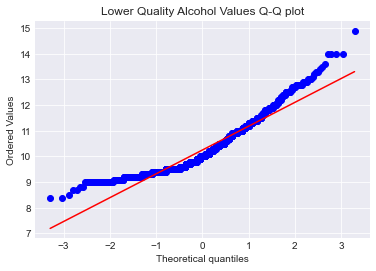

In [20]:
# plot probplot for normality for lower quality
stats.probplot(x=low_qual_samp, dist='norm', plot=plt)
plt.title('Lower Quality Alcohol Values Q-Q plot')
plt.show();

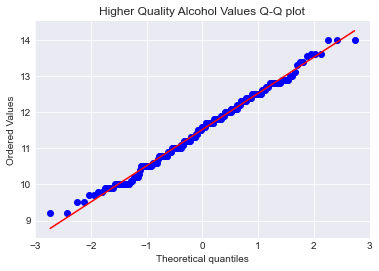

In [21]:
# plot Q-Q plot for normalit of higher Quality 
stats.probplot(x=high_qual_samp, dist='norm', plot=plt)
plt.title('Higher Quality Alcohol Values Q-Q plot')
plt.show();

It seems Out sample contains normaly distributed data. Lets plot a histplot to show their distribution

/home/josh/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/josh/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


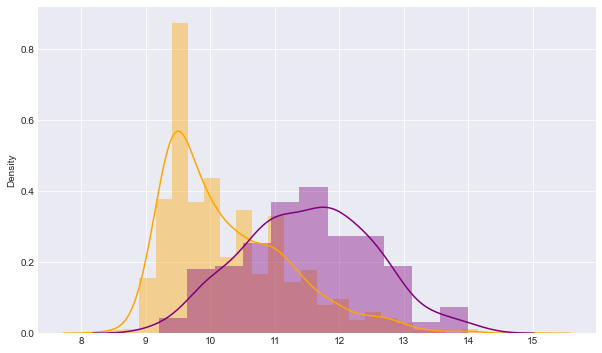

In [22]:
#Matplotlib fig and axes
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(low_qual_samp, kde=True, color='orange', ax=ax)
sns.distplot(high_qual_samp, kde=True, color='purple', ax=ax);

In [23]:
stat, p = stats.shapiro(high_qual_samp)
print(stat, p)

0.9914324879646301 0.2322702705860138


### Test Homoscedasticity

In [24]:
#Conduct Bartlett Test
stat, p = stats.bartlett(high_qual_samp, low_qual_samp)
print(f"Stat:{stat}, p_val:{p}")

Stat:0.3171862406986453, p_val:0.5733035382163396


## Conduct Hypothesis Test i.e use T-Test

Since the variables satisfy the conditions of **Homoscedasticity** and **Normality**

In [25]:
#perform Independend T-Test
stat, p = stats.ttest_ind(high_qual_samp, low_qual_samp)
print(f"Stat:{stat:}; p_val:{p}")

Stat:17.822763607394528; p_val:6.016774226316707e-65


## Conclusion

The p_value is less than $\alpha$ of 0.05, meaning we Alcohol content increase is a statistically significant event at the 95% confidence level.*We Reject the Null Hypothesis*